In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
try:
    df = pd.read_csv('D:\Jupyter\Data10Menit(2019-2024).csv')
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("Error: File data tidak ditemukan")


Data berhasil dimuat.


C:\Users\LENOVO GAMING\AppData\Local\Temp\ipykernel_8236\320720273.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\Jupyter\Data10Menit(2019-2024).csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298080 entries, 0 to 298079
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     298080 non-null  object 
 1   rainfall     275400 non-null  object 
 2   windspeed    275399 non-null  float64
 3   airtemp      275400 non-null  float64
 4   airhum       275401 non-null  float64
 5   airpress     275112 non-null  float64
 6   uvrad        275400 non-null  float64
 7   Unnamed: 7   0 non-null       float64
 8   Unnamed: 8   0 non-null       float64
 9   Unnamed: 9   0 non-null       float64
 10  Unnamed: 10  0 non-null       float64
 11  Unnamed: 11  144 non-null     float64
dtypes: float64(10), object(2)
memory usage: 27.3+ MB


In [4]:
df.head()

,Datetime,rainfall,windspeed,airtemp,airhum,airpress,uvrad,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1/1/2019 0:00,0.0,1.4,25.7,89.6,1001.0,48.5,NaN,NaN,NaN,NaN,NaN
1,1/1/2019 0:10,0.0,1.0,25.7,89.5,1001.0,74.8,NaN,NaN,NaN,NaN,NaN
2,1/1/2019 0:20,0.0,1.1,25.9,88.9,1001.1,100.7,NaN,NaN,NaN,NaN,NaN
3,1/1/2019 0:30,0.0,1.4,26.2,88.2,1001.1,90.3,NaN,NaN,NaN,NaN,NaN
4,1/1/2019 0:40,0.0,1.4,26.2,87.0,1001.1,126.7,NaN,NaN,NaN,NaN,NaN


In [5]:
# Konversi Datetime
df_cuaca = df[['Datetime', 'rainfall']].copy()
df_cuaca['Datetime'] = pd.to_datetime(df_cuaca['Datetime'])
df_cuaca.set_index('Datetime', inplace=True)

# Bersihkan dan Konversi Rainfall (jika masih object)
if df_cuaca['rainfall'].dtype == 'object':
    df_cuaca['rainfall'] = df_cuaca['rainfall'].astype(str).str.replace(',', '.', regex=False)
df_cuaca['rainfall'] = pd.to_numeric(df_cuaca['rainfall'], errors='coerce')
df_cuaca['rainfall'].fillna(0, inplace=True)

C:\Users\LENOVO GAMING\AppData\Local\Temp\ipykernel_8236\2291342102.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cuaca['rainfall'].fillna(0, inplace=True)


In [6]:
# Agregasi Harian
df_harian = df_cuaca.resample('D').sum()
df_harian.rename(columns={'rainfall': 'total_rainfall_harian'}, inplace=True)

# Fungsi Klasifikasi
def klasifikasi_hujan(curah_hujan):
    if curah_hujan < 5: return 'Berawan'
    elif curah_hujan <= 20: return 'Hujan Ringan'
    elif curah_hujan <= 50: return 'Hujan Sedang'
    elif curah_hujan <= 100: return 'Hujan Lebat'
    else: return 'Hujan Sangat Lebat'

# Terapkan Klasifikasi
df_harian['state'] = df_harian['total_rainfall_harian'].apply(klasifikasi_hujan)
print("--- Data Harian dengan State ---")
df_harian.head()

--- Data Harian dengan State ---


,total_rainfall_harian,state
Datetime,,
2019-01-01,4.8,Berawan
2019-01-02,1.8,Berawan
2019-01-03,0.0,Berawan
2019-01-04,0.0,Berawan
2019-01-05,7.4,Hujan Ringan


In [7]:
df_harian.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2019-01-01 to 2024-08-31
Freq: D
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_rainfall_harian  2070 non-null   float64
 1   state                  2070 non-null   object 
dtypes: float64(1), object(1)
memory usage: 48.5+ KB


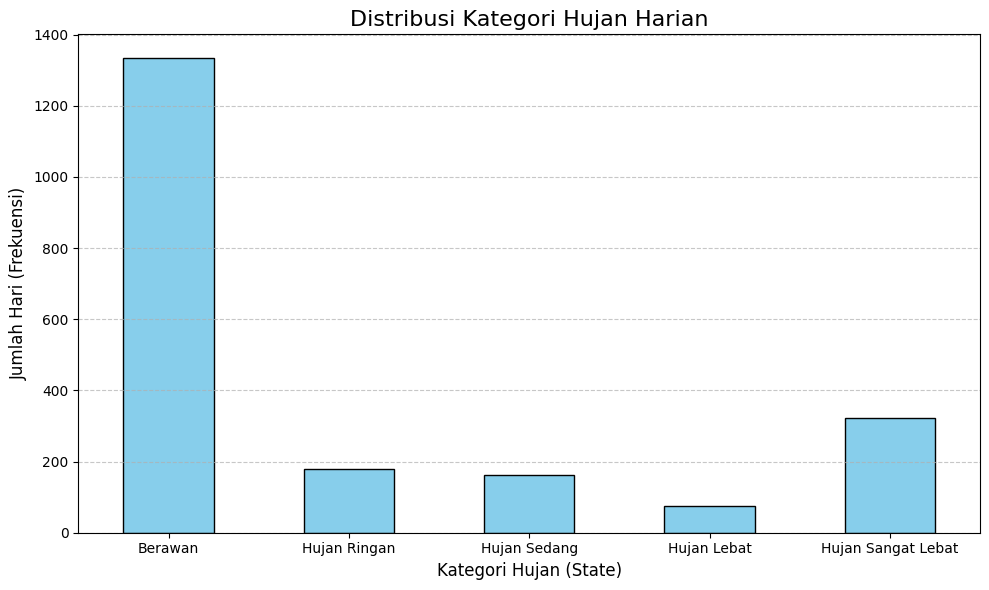

In [ ]:
# Hitung jumlah tiap state
state_counts = df_harian['state'].value_counts()

# Tentukan urutan logis untuk kategori (agar plot terurut rapi)
category_order = ['Berawan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat', 'Hujan Sangat Lebat']

# Urutkan state_counts berdasarkan urutan logis
state_counts_sorted = state_counts.reindex(category_order).fillna(0)

# Buat plot
plt.figure(figsize=(10, 6)) # Atur ukuran gambar agar jelas
# Gunakan .plot(kind='bar') dari pandas yang sudah terurut
state_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribusi Kategori Hujan Harian', fontsize=16)
plt.ylabel('Jumlah Hari (Frekuensi)', fontsize=12)
plt.xlabel('Kategori Hujan (State)', fontsize=12)
plt.xticks(rotation=0) # Buat label x-axis horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Tambah grid horizontal
plt.tight_layout() # Merapikan layout


In [ ]:
nama_file_csv = 'data_harian_terklasifikasi.csv'
# index=True agar tanggal (Datetime) tetap ikut tersimpan
df_harian.to_csv(nama_file_csv, index=True) 
print(f"Data harian yang terklasifikasi berhasil disimpan sebagai: {nama_file_csv}")

Data harian yang terklasifikasi berhasil disimpan sebagai: data_harian_terklasifikasi.csv
